# Tugas klasifikasi
## Rahmat Sunjani [ 55201120030 ]
## Putri Avrilya [ 55201120030 ]

In [ ]:
import pandas as pd
# url = 'https://bit.ly/3tZGkAR'
url = '../kaggle-survey-2022/kaggle_survey_2022_responses.csv'
df = pd.read_csv(url)
df = df.rename(columns= {'Duration (in seconds)':'Q1'})

In [ ]:
## change to view all collum use
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_7', 'Q6_8', 'Q11', 'Q12_4', 'Q13_5', 'Q23', 'Q24', 'Q31_1', 'Q44_1']]

In [ ]:
## change name to view all collum use
df = df.rename(columns={'Q1':'duration', 'Q2':'age', 'Q3':'gender', 'Q4':'country', 'Q5':'educational_status','Q6_1':'coursera', 'Q6_2':'edX', 'Q6_3':'kaggle', 'Q6_4':'datacamp', 'Q6_7':'udemy', 'Q6_8':'linkedIn', 'Q11':'writing_code_year', 'Q12_4':'programming_languages', 'Q13_5':'IDE', 'Q23':'current_role', 'Q24':'current_industry', 'Q31_1':'cloud_computing', 'Q44_1':'favorite_media_sources'})[1:]

In [ ]:
courses = df[['coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]
print(courses)#.columns.tolist()

In [ ]:
# cek data null atau kosong ( namun data lain bisa digunakan )
df.isna().sum()

In [ ]:
# Cek Data Type
df.dtypes

In [ ]:
## 1. Menampilkan data berdasarkan country terbanyak pengunjung survey.
soal_1 = df[['age', 'gender', 'educational_status', 'country', 'duration']]

# CARI DATA COUNTRY
country_10 = soal_1['country'].value_counts()[:5]

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.patch.set_facecolor('lightblue')  # type: ignore
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x = country_10.index.tolist()
y = country_10.tolist()
plt.xlabel('COUNTRY')
plt.ylabel('DURATION')
plt.title('Top 5 Country')
plt.grid(True)
plt.plot(x, y,color='brown')
addlabels(x, y)
plt.show()

print(f'\n\n=== Top 5 Negara Pengunjung Terbanyak ===\n\n{country_10}')
print(f'\n\n===== INSIGHT =====\n\n')


In [72]:
join = df[['gender', 'coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]

coursera = join[(df['coursera'] == 'Coursera') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
coursera = coursera['gender']

edX = join[(df['edX'] == 'edX') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
edX = edX['gender']

kaggle = join[(df['kaggle'] == 'Kaggle Learn Courses') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
kaggle = kaggle['gender']

datacamp = join[(df['datacamp'] == 'DataCamp') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
datacamp = datacamp['gender']

udemy = join[(df['udemy'] == 'Udemy') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
udemy = udemy['gender']

linkedIn = join[(df['linkedIn'] == 'LinkedIn Learning') & ((df['gender']=='Man') | (df['gender']=='Woman'))]
linkedIn = linkedIn['gender']

all_courses = {
    "cousera" : coursera.tolist(),
    "edX" : edX.tolist(),
    "kaggle" : kaggle.tolist(),
    "datacamp" : datacamp.tolist(),
    "udemy" : udemy.tolist(),
    "linkedIn" : linkedIn.tolist()
}
fix = pd.DataFrame(all_courses)
fix

ValueError: All arrays must be of the same length

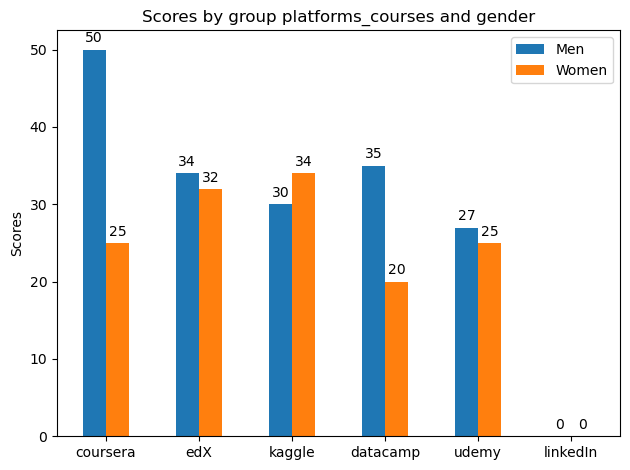

In [35]:
# 2. Menampilkan data age berdasarkan platforms_courses.

import matplotlib.pyplot as plt
import numpy as np


labels = courses.columns.to_list() # 6
men_means = [50, 34, 30, 35, 27, 0]
women_means = [25, 32, 34, 20, 25, 0]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), men_means, width, label='Men')
rects2 = ax.bar(x + (width/2), women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group platforms_courses and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()